In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from keras.losses import binary_crossentropy
import os 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

In [4]:
summary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Chest_xray_Corona_dataset_Summary.csv')
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Chest_xray_Corona_Metadata.csv')

In [5]:
summary


,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4
5,5,Pnemonia,bacteria,NaN,2772
6,6,Pnemonia,bacteria,Streptococcus,5


In [6]:
metadata

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [7]:
train_data=metadata[metadata['Dataset_type']=='TRAIN']

In [8]:
train_data.shape

(5286, 6)

In [9]:
train_data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [10]:
train_data.isna().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5217
Label_1_Virus_category    1342
dtype: int64

In [11]:
train_data['Label_1_Virus_category'].value_counts()

bacteria          2535
Virus             1407
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [12]:
train_data=train_data.fillna('n/a')

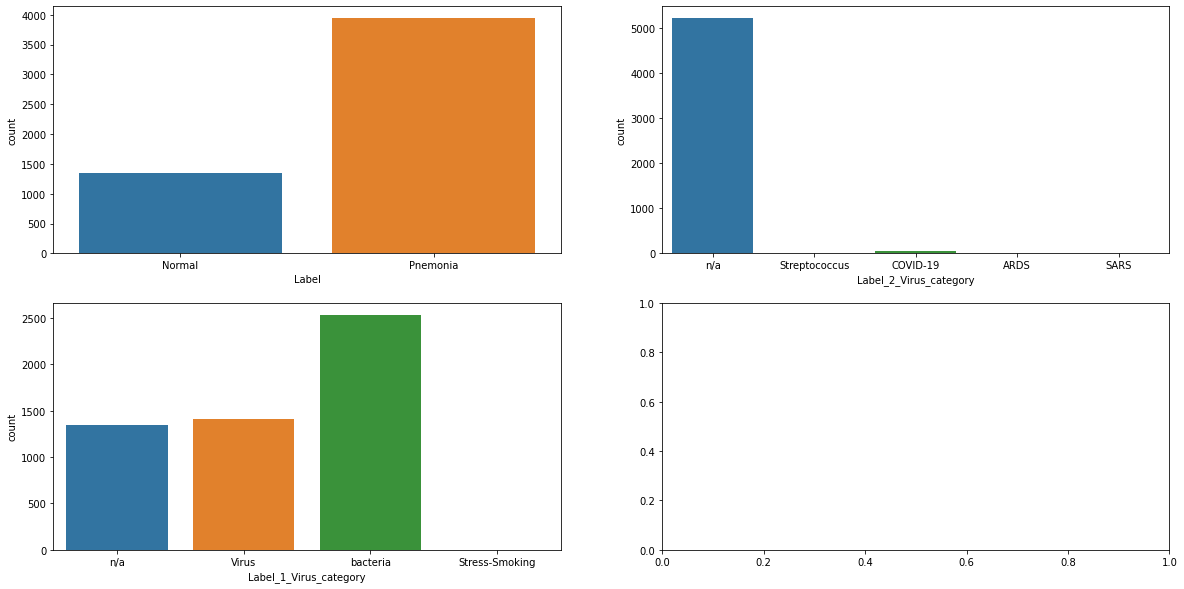

In [13]:
targets = ['Label', 'Label_2_Virus_category', 'Label_1_Virus_category']
fig,ax=plt.subplots(2,2, figsize=(20, 10))
sns.countplot(x=targets[0],data=train_data, ax=ax[0, 0])
sns.countplot(x=targets[1],data=train_data, ax=ax[0, 1])
sns.countplot(x=targets[2],data=train_data, ax=ax[1, 0])
plt.show()

In [14]:
TRAIN_FOLDER = '/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train'

In [15]:
sample_train_images = list(os.walk(TRAIN_FOLDER))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(TRAIN_FOLDER, x), sample_train_images))

In [16]:
sample_train_images 

['/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train/person598_bacteria_2454.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train/person544_virus_1074.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train/person545_bacteria_2290.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train/person544_virus_1079.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train/person569_bacteria_2364.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Capstone/covid19_dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train1/train/person540_virus_1

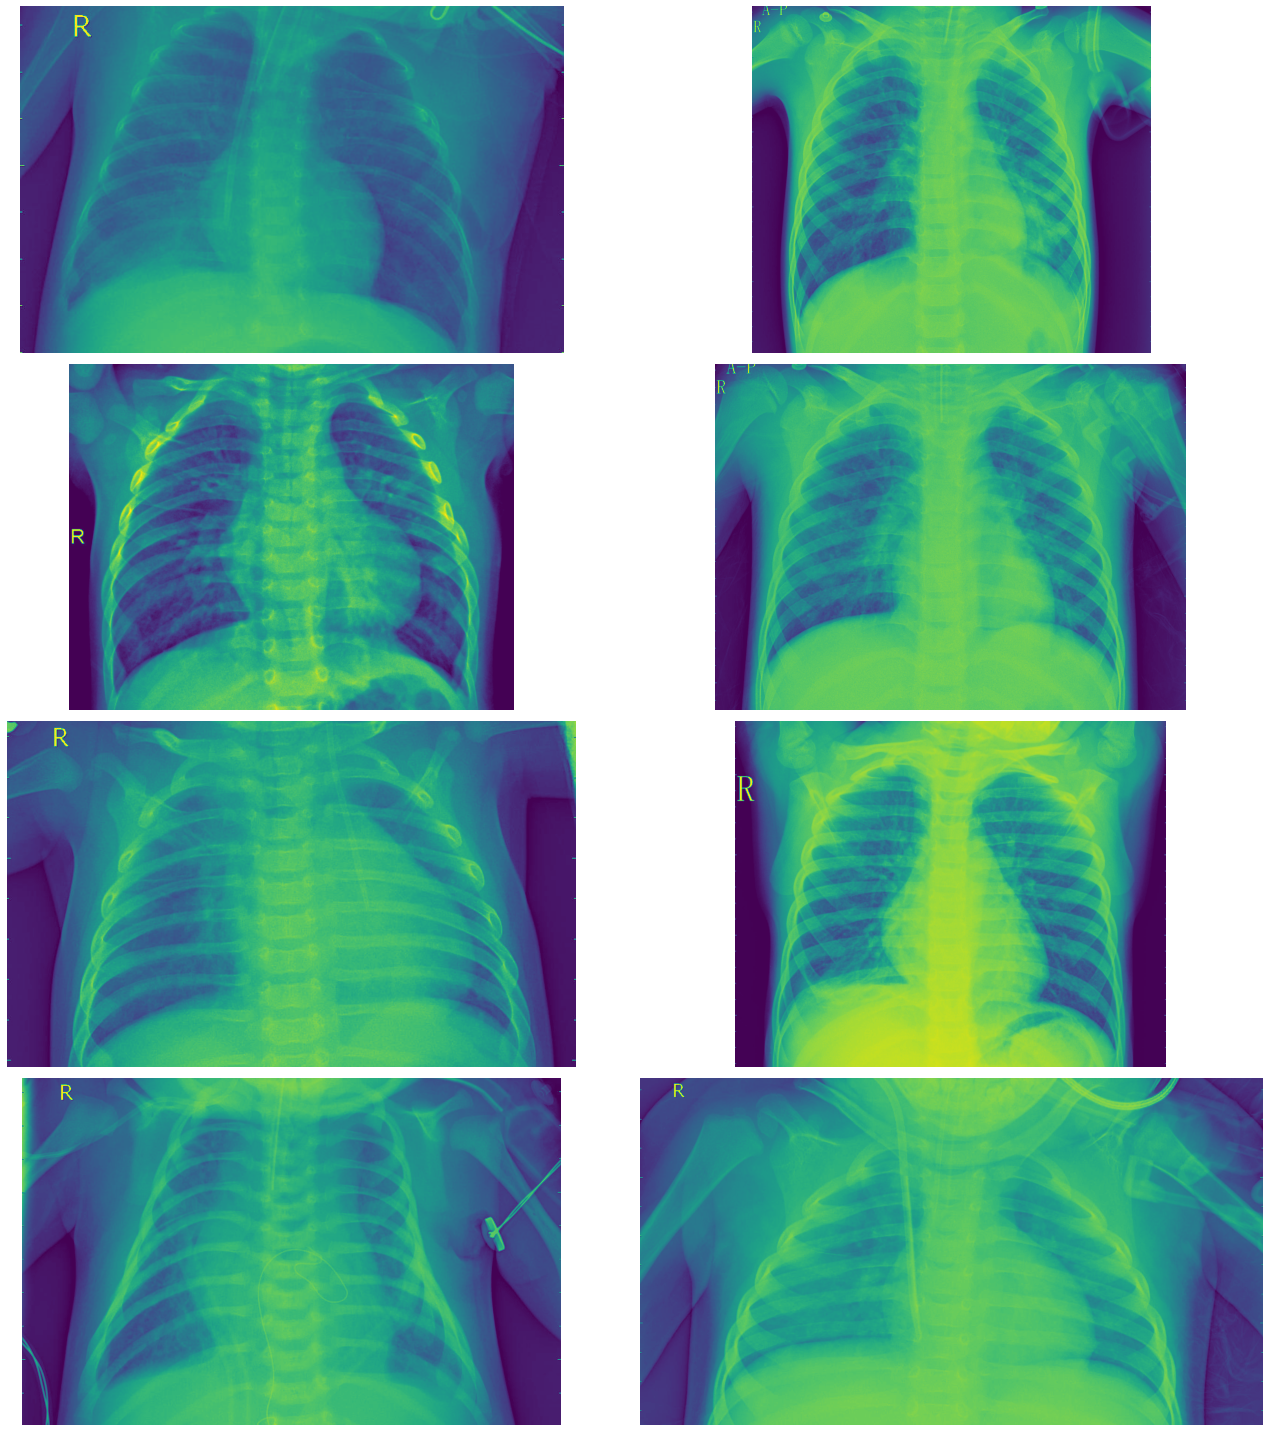

In [17]:
plt.figure(figsize=(20, 20))

for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4, 2, iterator+1)
    plt.axis('off')
    plt.imshow(image)


plt.tight_layout()


In [ ]:
balanced_data=train_data[(train_data['Label']=='Normal')| 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]

In [ ]:
balanced_data['target'] =['negative' if holder == 'Normal' else 'positive' for holder in balanced_data['Label']]

In [18]:
from sklearn.utils import shuffle
#balanced_data_subset_normal=balanced_data[balanced_data['target']=='negative']
#balanced_data_subset_covid=balanced_data[balanced_data['target']=='positive']
#balanced_data_frac_normal = balanced_data_subset_normal.sample(frac=(1/5))

#balanced_data_concat = pd.concat([balanced_data_frac_normal, balanced_data_subset_covid], axis=0)
#balanced_data_concat = shuffle(balanced_data_concat, random_state=0)
#balanced_data_train = balanced_data_concat[:240]
#balanced_data_validation = balanced_data_concat[240:]


In [ ]:
balanced_data_concat.shape

(326, 7)

In [ ]:
balanced_data_subset_normal.shape

(1342, 7)

In [ ]:
balanced_data_train.shape

(240, 7)

In [ ]:
balanced_data_frac_normal.shape

(268, 7)

In [19]:
train_data = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]
train_data['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in train_data['Label']]

train_data = shuffle(train_data, random_state=1)

validation_data = train_data.iloc[1000:, :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5]
)


train_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=validation_data,
    directory=TRAIN_FOLDER,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=8,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)


Found 1400 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


In [21]:
def schedule(epoch):
    if epoch<5:
        return 0.0001
    else:
        print('learning rate')
        return  0.0001 * np.exp(0.5 * (5 - epoch))

In [22]:
from keras.metrics import *
from keras.callbacks import LearningRateScheduler
custom_callback = LearningRateScheduler(schedule)

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
]

In [23]:
model=Sequential([
Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
MaxPooling2D((3,3)),
Conv2D(32,(3,3),activation='relu'),
MaxPooling2D((3,3)),
Conv2D(32,(3,3),activation='relu'),
Flatten(),
Dense(64,activation='relu'),
Dropout(0.2),
Dense(16,activation='relu'),
Dropout(0.2),
Dense(1,activation='sigmoid')])

In [24]:
model.compile(optimizer=Adam(),loss=binary_crossentropy,metrics=METRICS)

In [25]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 180s 953ms/step - loss: 0.2072 - tp: 0.0000e+00 - fp: 1.0000 - tn: 1341.0000 - fn: 58.0000 - accuracy: 0.9579 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2162 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 74s 421ms/step - loss: 0.1505 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 58.0000 - accuracy: 0.9586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1558 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 73s 419ms/step - loss: 0.1414 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 58.0000 - accuracy: 0.9586 - precision: 0.0000e+00 - reca

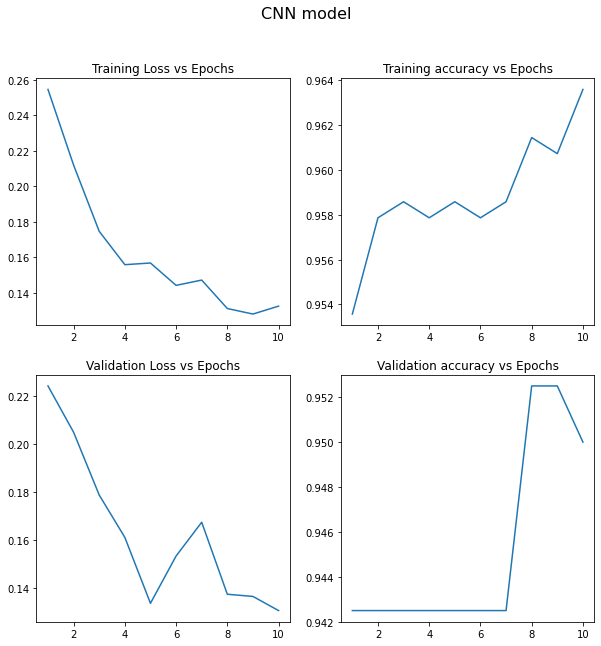

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('CNN model', size=16)
plt.show()

mobile net v2


In [ ]:
mob_model = Sequential()
mob_model.add(tf.keras.applications.MobileNetV2(include_top=False, pooling = 'avg', weights='imagenet',input_shape=(224, 224, 3), classes=2))
mob_model.add(Dense(32, activation='relu'))
mob_model.add(Dense(1, activation='sigmoid'))
mob_model.layers[0].trainable = False
mob_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 139s 795ms/step - loss: 0.1279 - tp: 14.0000 - fp: 2.0000 - tn: 1340.0000 - fn: 44.0000 - accuracy: 0.9671 - precision: 0.8750 - recall: 0.2414 - val_loss: 0.1223 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 22.0000 - val_accuracy: 0.9450 - val_precision: 1.0000 - val_recall: 0.0435 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 139s 794ms/step - loss: 0.1213 - tp: 12.0000 - fp: 3.0000 - tn: 1339.0000 - fn: 46.0000 - accuracy: 0.9650 - precision: 0.8000 - recall: 0.2069 - val_loss: 0.1194 - val_tp: 13.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 10.0000 - val_accuracy: 0.9750 - val_precision: 1.0000 - val_recall: 0.5652 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 139s 791ms/step - loss: 0.1161 - tp: 15.0000 - fp: 2.0000 - tn: 1340.0000 - fn: 43.0000 - accuracy: 0.9679 - precision: 0.8824 - recall: 0.2586 - val_loss: 0.1232 - val_tp: 5.0000 - val_fp: 1

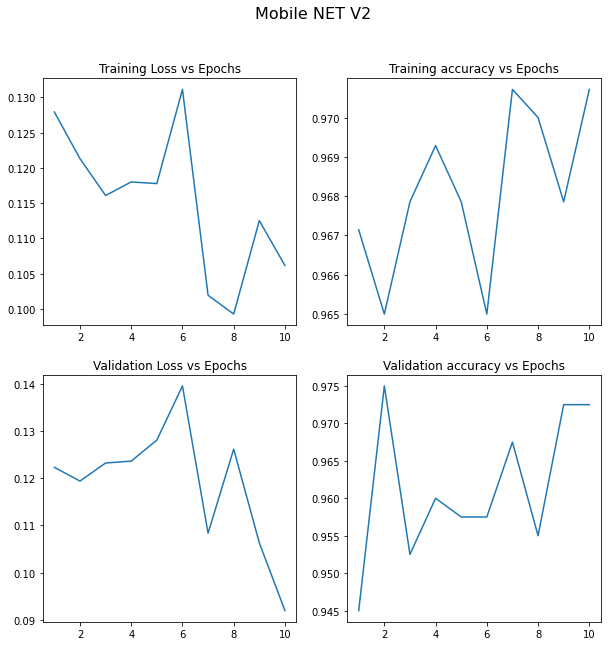

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('Mobile NET V2', size=16)
plt.show()

DenseNet

In [ ]:
from keras.applications.densenet import DenseNet201, DenseNet121

In [ ]:
dense_model = Sequential()
dense_model.add(DenseNet121(include_top=False, pooling = 'avg', weights='imagenet',input_shape=(224, 224, 3), classes=2))
dense_model.add(Dense(512, activation='relu'))
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(1, activation='sigmoid'))
dense_model.layers[0].trainable = False
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 142s 809ms/step - loss: 0.1026 - tp: 22.0000 - fp: 3.0000 - tn: 1339.0000 - fn: 36.0000 - accuracy: 0.9721 - precision: 0.8800 - recall: 0.3793 - val_loss: 0.1073 - val_tp: 8.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 15.0000 - val_accuracy: 0.9625 - val_precision: 1.0000 - val_recall: 0.3478 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 140s 800ms/step - loss: 0.0967 - tp: 21.0000 - fp: 4.0000 - tn: 1338.0000 - fn: 37.0000 - accuracy: 0.9707 - precision: 0.8400 - recall: 0.3621 - val_loss: 0.1177 - val_tp: 11.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 12.0000 - val_accuracy: 0.9700 - val_precision: 1.0000 - val_recall: 0.4783 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 140s 798ms/step - loss: 0.1038 - tp: 25.0000 - fp: 9.0000 - tn: 1333.0000 - fn: 33.0000 - accuracy: 0.9700 - precision: 0.7353 - recall: 0.4310 - val_loss: 0.1141 - val_tp: 9.0000 - val_fp: 2

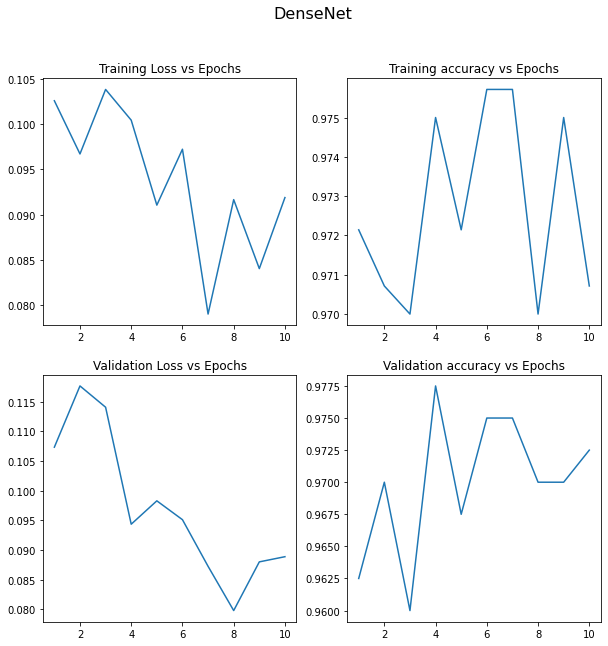

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('DenseNet', size=16)
plt.show()

EfficientNetB2

In [ ]:
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
base_model = EfficientNetB2(input_shape=(224, 224, 3), include_top=False, weights="imagenet", pooling = "max")

In [ ]:
base_model.trainable = False
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 143s 807ms/step - loss: 0.0977 - tp: 39.0000 - fp: 11.0000 - tn: 1708.0000 - fn: 42.0000 - accuracy: 0.9706 - precision: 0.7800 - recall: 0.4815 - val_loss: 0.1134 - val_tp: 9.0000 - val_fp: 1.0000 - val_tn: 376.0000 - val_fn: 14.0000 - val_accuracy: 0.9625 - val_precision: 0.9000 - val_recall: 0.3913 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 140s 798ms/step - loss: 0.0959 - tp: 24.0000 - fp: 5.0000 - tn: 1337.0000 - fn: 34.0000 - accuracy: 0.9721 - precision: 0.8276 - recall: 0.4138 - val_loss: 0.0854 - val_tp: 16.0000 - val_fp: 3.0000 - val_tn: 374.0000 - val_fn: 7.0000 - val_accuracy: 0.9750 - val_precision: 0.8421 - val_recall: 0.6957 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 139s 796ms/step - loss: 0.0951 - tp: 27.0000 - fp: 4.0000 - tn: 1338.0000 - fn: 31.0000 - accuracy: 0.9750 - precision: 0.8710 - recall: 0.4655 - val_loss: 0.0886 - val_tp: 15.0000 - val_fp: 3.0000 -

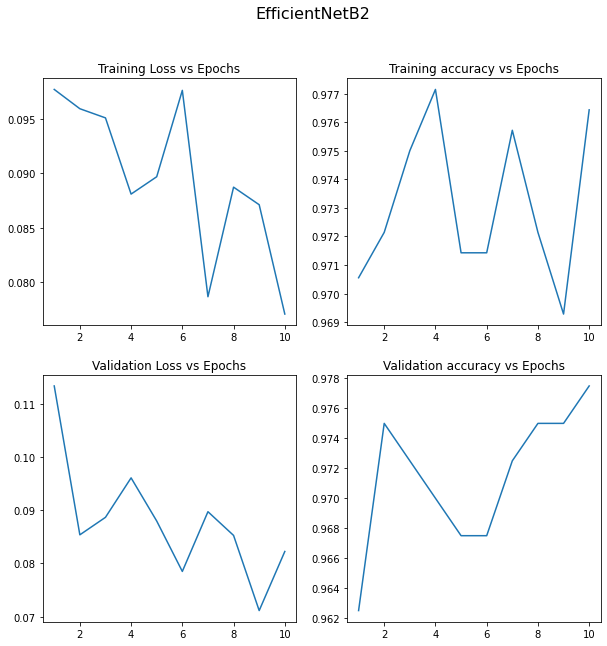

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('EfficientNetB2', size=16)
plt.show()

EfficientNetB3


In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
base_model = EfficientNetB3(include_top=False, weights='imagenet', pooling='max', input_shape=(224,224,3))

In [ ]:
base_model.trainable = False
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 444s 3s/step - loss: 0.2424 - tp: 0.0000e+00 - fp: 17.0000 - tn: 1325.0000 - fn: 58.0000 - accuracy: 0.9464 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2183 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 147s 842ms/step - loss: 0.1952 - tp: 0.0000e+00 - fp: 3.0000 - tn: 1339.0000 - fn: 58.0000 - accuracy: 0.9564 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1709 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 147s 838ms/step - loss: 0.1499 - tp: 0.0000e+00 - fp: 1.0000 - tn: 1341.0000 - fn: 58.0000 - accuracy: 0.9579 - precision: 0.0000e+00 - recall: 0.00

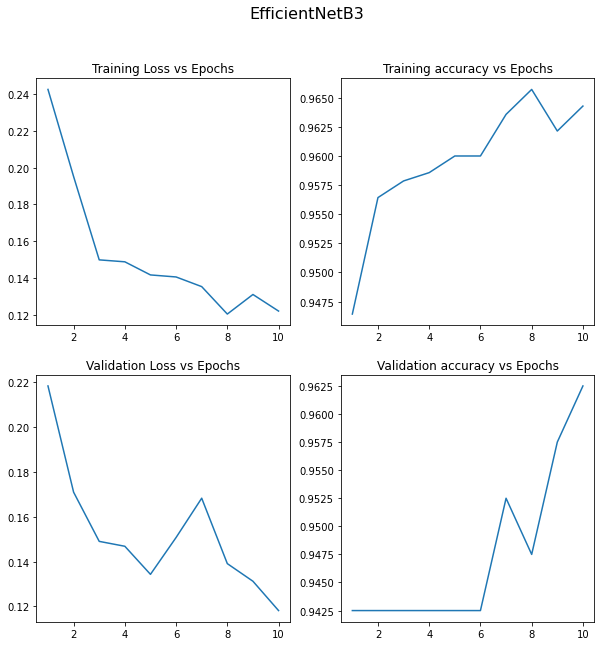

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('EfficientNetB3', size=16)
plt.show()

EfficientNetB7

In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
base_model = EfficientNetB7(include_top=False, weights='imagenet', pooling='max', input_shape=(224,224,3))

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = False
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 551s 3s/step - loss: 0.2516 - tp: 0.0000e+00 - fp: 7.0000 - tn: 1335.0000 - fn: 58.0000 - accuracy: 0.9536 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2043 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 143s 816ms/step - loss: 0.1963 - tp: 0.0000e+00 - fp: 2.0000 - tn: 1340.0000 - fn: 58.0000 - accuracy: 0.9571 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1691 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 147s 834ms/step - loss: 0.1540 - tp: 1.0000 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 57.0000 - accuracy: 0.9593 - precision: 1.0000 - recall: 0.0172 - 

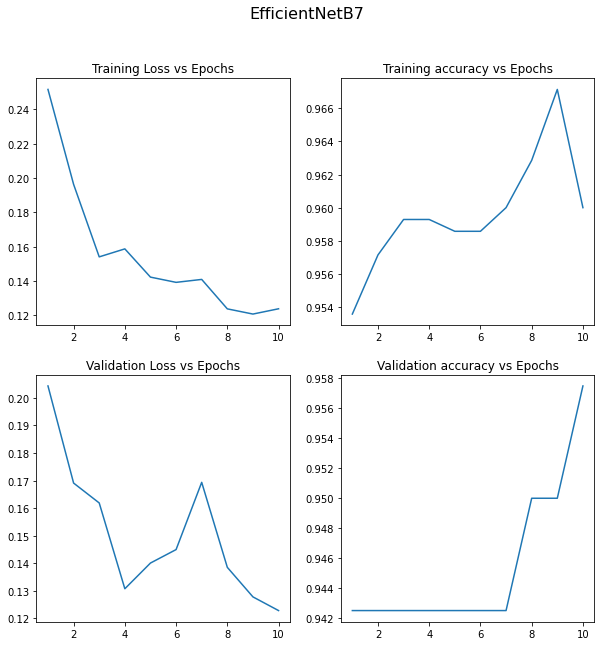

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('EfficientNetB7', size=16)
plt.show()

VGG16


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:
Image_size=[224,224]
vgg=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)
vgg.output

58900480/58889256 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(1,activation='sigmoid')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 154s 807ms/step - loss: 0.1700 - tp: 0.0000e+00 - fp: 2.0000 - tn: 1340.0000 - fn: 58.0000 - accuracy: 0.9571 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1648 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 66s 376ms/step - loss: 0.1255 - tp: 1.0000 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 57.0000 - accuracy: 0.9593 - precision: 1.0000 - recall: 0.0172 - val_loss: 0.1234 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 21.0000 - val_accuracy: 0.9475 - val_precision: 1.0000 - val_recall: 0.0870 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 66s 376ms/step - loss: 0.1008 - tp: 3.0000 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 55.0000 - accuracy: 0.9607 - precision: 1.0000 - recall: 0.0517 - val_loss: 0.0946 - 

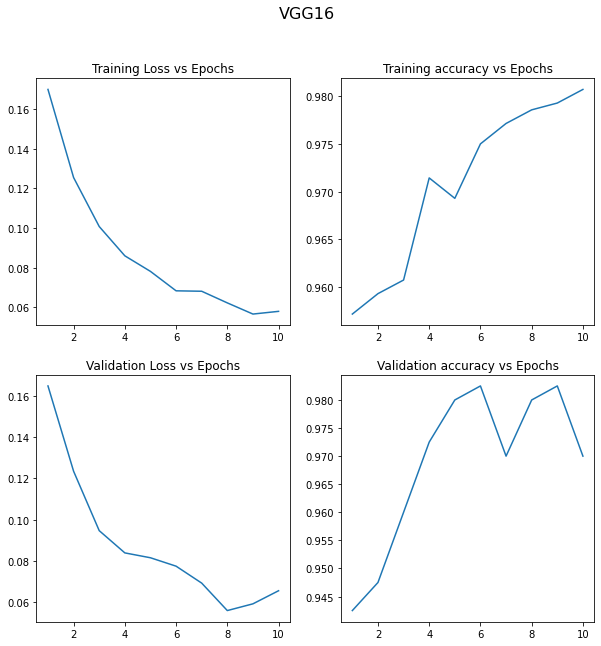

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('VGG16', size=16)
plt.show()

VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

In [ ]:
Image_size=[224,224]
vgg=VGG19(input_shape=Image_size+[3],weights='imagenet',include_top=False)
vgg.output

80150528/80134624 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(1,activation='sigmoid')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 76s 413ms/step - loss: 0.1650 - tp: 12.0000 - fp: 10.0000 - tn: 1709.0000 - fn: 69.0000 - accuracy: 0.9561 - precision: 0.5455 - recall: 0.1481 - val_loss: 0.1785 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 68s 391ms/step - loss: 0.1294 - tp: 2.0000 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 56.0000 - accuracy: 0.9600 - precision: 1.0000 - recall: 0.0345 - val_loss: 0.1598 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 68s 390ms/step - loss: 0.1108 - tp: 4.0000 - fp: 0.0000e+00 - tn: 1342.0000 - fn: 54.0000 - accuracy: 0.9614 - precision: 1.0000 - recall: 0.0690 - val_loss: 0.1150 -

Inception V3

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# our layers 
x = Flatten()(inception.output)
#prediction = Dense(1, activation='sigmoid')(x) (Eta te better accuracy ashe)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                             

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 370s 2s/step - loss: 0.1234 - tp: 22.0000 - fp: 15.0000 - tn: 1327.0000 - fn: 36.0000 - accuracy: 0.9636 - precision: 0.5946 - recall: 0.3793 - val_loss: 0.0471 - val_tp: 16.0000 - val_fp: 3.0000 - val_tn: 374.0000 - val_fn: 7.0000 - val_accuracy: 0.9750 - val_precision: 0.8421 - val_recall: 0.6957 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 69s 396ms/step - loss: 0.0648 - tp: 38.0000 - fp: 9.0000 - tn: 1333.0000 - fn: 20.0000 - accuracy: 0.9793 - precision: 0.8085 - recall: 0.6552 - val_loss: 0.0692 - val_tp: 14.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 9.0000 - val_accuracy: 0.9775 - val_precision: 1.0000 - val_recall: 0.6087 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 69s 393ms/step - loss: 0.0562 - tp: 43.0000 - fp: 9.0000 - tn: 1333.0000 - fn: 15.0000 - accuracy: 0.9829 - precision: 0.8269 - recall: 0.7414 - val_loss: 0.0523 - val_tp: 22.0000 - val_fp: 7.0000 - 

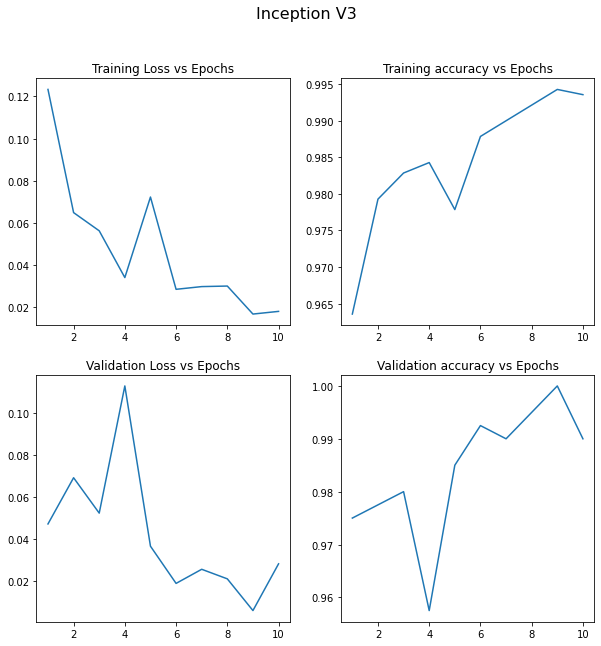

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('Inception V3', size=16)
plt.show()

alexnet


In [ ]:
# Common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Utils
from tqdm import tqdm
import datetime

# Sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, AveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
# When export model, these preprocessing layers will be saved along with the rest of model
resize_and_rescale = Sequential([
    Resizing(227, 227),
    Rescaling(1./255)
])

In [ ]:
def create_dir(dir_path):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
        
create_dir('models')

In [ ]:
lamb = 0.9

model = Sequential([
    # Preprocessing layer
    resize_and_rescale,
    
    InputLayer((227, 227, 3)),
    
    # 1st layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu', kernel_regularizer=l2(lamb), name='conv1'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    BatchNormalization(),
    
    # 2nd layer
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv2'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    BatchNormalization(),
    
    # 3rd layer
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv3'),
    BatchNormalization(),
    
    # 4th layer
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv4'),
    BatchNormalization(),
    
    # 5th layer
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv5'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    BatchNormalization(),
    
    # Flatten
    Flatten(),
    
    # 6th layer
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    
    # 7th layer
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    
    # 8th layer (output)
    Dense(units=1, activation='sigmoid')
], name='AlexNet')

In [ ]:
#Create folder contains model's files
model_dir = 'models/alexnet'
model_file = 'best_alexnet.hdf5'
create_dir(model_dir)

checkpoint = ModelCheckpoint(os.path.join(model_dir, model_file),
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=30,
                               verbose=1,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), 
                              patience=7, min_delta=1e-3, verbose=1, min_lr=1e-7)

In [ ]:
# Initialize TensorBoard
log_dir = 'models/alexnet/logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 73s 392ms/step - loss: 496.9487 - tp: 28.0000 - fp: 24.0000 - tn: 1695.0000 - fn: 53.0000 - accuracy: 0.9572 - precision: 0.5385 - recall: 0.3457 - val_loss: 175.3794 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 68s 391ms/step - loss: 76.7771 - tp: 16.0000 - fp: 34.0000 - tn: 1308.0000 - fn: 42.0000 - accuracy: 0.9457 - precision: 0.3200 - recall: 0.2759 - val_loss: 22.4997 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 23.0000 - val_accuracy: 0.9425 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 70s 398ms/step - loss: 9.2056 - tp: 10.0000 - fp: 33.0000 - tn: 1309.0000 - fn: 48.0000 - accuracy: 0.9421 - precision: 0.2326 - recall: 0.1724 - val_loss: 4.1057

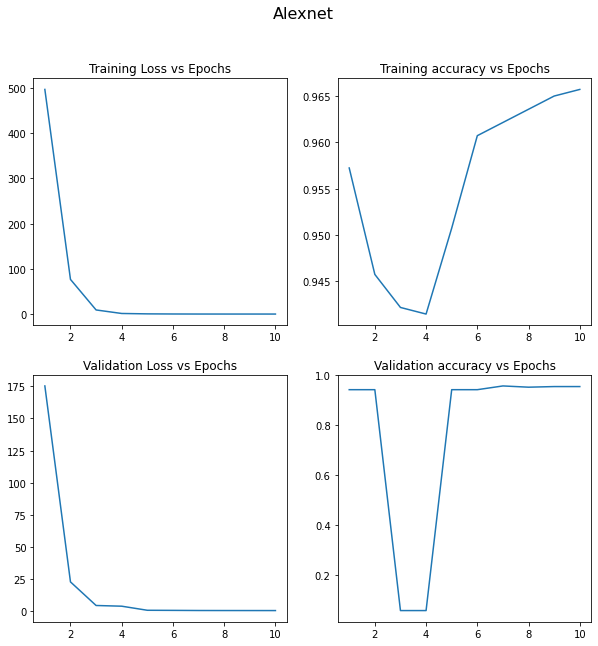

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('Alexnet', size=16)
plt.show()

Xception

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax

from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
inputs = tf.keras.layers.Input((150,150,3))
base_model=tf.keras.applications.xception.Xception(include_top=False, weights="imagenet",input_shape=(150,150,3), pooling='avg') 
x=base_model(inputs)
output=layers.Dense(1, activation='sigmoid')(x)
model=tf.keras.models.Model(inputs=inputs, outputs=output)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:

history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,callbacks=[custom_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
175/175 [==============================] - 658s 4s/step - loss: 0.1104 - tp: 24.0000 - fp: 6.0000 - tn: 1336.0000 - fn: 34.0000 - accuracy: 0.9714 - precision: 0.8000 - recall: 0.4138 - val_loss: 0.0436 - val_tp: 17.0000 - val_fp: 0.0000e+00 - val_tn: 377.0000 - val_fn: 6.0000 - val_accuracy: 0.9850 - val_precision: 1.0000 - val_recall: 0.7391 - lr: 1.0000e-04
Epoch 2/10
175/175 [==============================] - 97s 552ms/step - loss: 0.0310 - tp: 52.0000 - fp: 4.0000 - tn: 1338.0000 - fn: 6.0000 - accuracy: 0.9929 - precision: 0.9286 - recall: 0.8966 - val_loss: 0.0226 - val_tp: 23.0000 - val_fp: 2.0000 - val_tn: 375.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9950 - val_precision: 0.9200 - val_recall: 1.0000 - lr: 1.0000e-04
Epoch 3/10
175/175 [==============================] - 96s 548ms/step - loss: 0.0315 - tp: 52.0000 - fp: 7.0000 - tn: 1335.0000 - fn: 6.0000 - accuracy: 0.9907 - precision: 0.8814 - recall: 0.8966 - val_loss: 0.0175 - val_tp: 23.0000 - val_fp: 1.0000 -

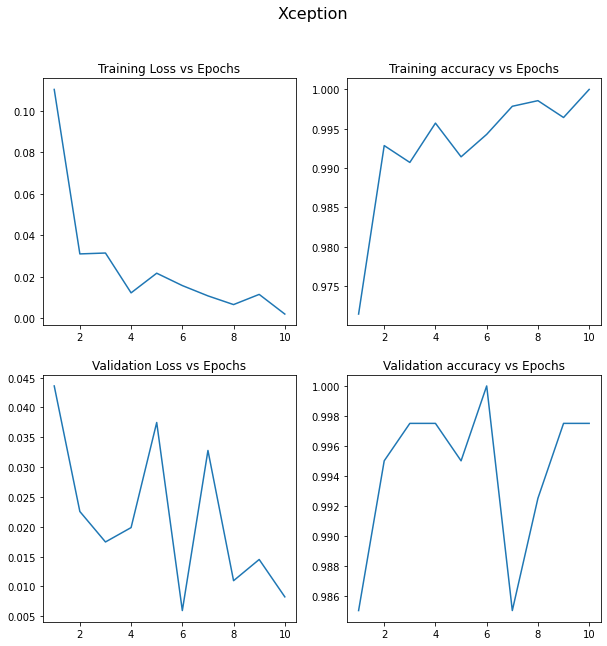

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation accuracy vs Epochs')
fig.suptitle('Xception', size=16)
plt.show()

EDA baseline 